In [2]:
# Imports

import pandas as pd
import numpy as ny

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# showing all dataframe columns:

pd.set_option('display.max_columns', None)

In [4]:
# set matplotlib global settings eg. figsize:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [5]:
# Read London Airbnb Data:
airbnb_ldn = pd.read_csv('data/LondonData.csv')

Option settings:

In [6]:
# First look into raw dataframe:
airbnb_ldn.head().T

,0,1,2,3,4
Listing Title,Twin Ensuite with Shower at Colnbrook Lodge Gu...,Single Shared Bathroom at Colnbrook Lodge Gues...,Luxury New Alpine Lodge in Private Walled Garden,Chessington World of Adventures House,Charming house -15min to London
Property Type,Private room in guesthouse,Private room in guesthouse,Entire cabin,Entire home,Private room in home
Listing Type,private_room,private_room,entire_home,entire_home,private_room
Created Date,2022-07-23,2022-07-23,2023-01-18,2022-07-22,2022-12-12
Last Scraped Date,2022-07-27,2022-08-03,2023-05-03,2022-08-03,2023-10-11
Country,GB,GB,GB,GB,GB
State,UK,UK,UK,UK,UK
City,Colnbrook,Colnbrook,Claygate,Greater London,Chessington
Zipcode,SL3 0,SL3 0,KT10 0,KT9 2,KT9 2
Currency Native,GBP,GBP,GBP,GBP,GBP


In [7]:
# checking dimensions of dataframe:
airbnb_ldn.shape

(43580, 54)

The dataframe consists of 54 columns and 43580 rows.

In [8]:
# More thorough check of data included in dataset:
airbnb_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43580 entries, 0 to 43579
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Listing Title                                      43576 non-null  object 
 1   Property Type                                      43580 non-null  object 
 2   Listing Type                                       43580 non-null  object 
 3   Created Date                                       43580 non-null  object 
 4   Last Scraped Date                                  43580 non-null  object 
 5   Country                                            43580 non-null  object 
 6   State                                              43580 non-null  object 
 7   City                                               43580 non-null  object 
 8   Zipcode                                            43580 non-null  object 
 9   Curren

Some more indepth analysis of the various columns will be conducted. 

Any columns that are not necessary for the modelling process shall be dropped. 
- Columns that are semantically the same will be dropped.
- Columns that do not serve any relevant purpose and don't add additional value to the future insights will be dropped.

To begin, columns that can be deemed uneccessary will be dropped:

- The two columns 'country' and 'state' can be dropped. As this is the London dataset, all the pieces of data on these columns will be the same and won't   serve any values. 
- There are numerous columns that have some monetary information. There are duplicates, with columns being in both native currency (GBP) and USD. When models are created, these columns will be colinear (they are the same information just scaled). For that reason, the USD columns will be dropped (they could be reincluded at a later date, if comparison are to be made between various cities). The columns that have these currency duplicates are: 'Cleaning fee', 'Extra people fee', 'Average daily rate' and 'Annual revenue LTM'. These columns will all be dropped.
- Two other columns which don't add to the insights are the 'Date Created' and the 'Last scraped' column.
The relevant timeframe values are all based on the 'Last Twelve Months' [LTM]. Where the timeframe is relevant, the LTM detail has been listed in the column title. Knowledge of when the column was created and when data was last scraped from it, does not aid in any form of comparative insight.
- License column, is made up entirely of null values. Can be dropped.
- The instant bookable column also contains many null values, and isn't a particularly valuable independent value, this column will be dropped. Instantbook availalbe is not very useful, will be dropped too.
- Drop 'currency native' column, it does not add any value (all data is known to be in GBP).
- Drop property ID column (it does not add any particular value to the dataframe and potential analysis).
- Drop Listing URL, not relevant information.
- Picture url can be dropped.



A quick check will be conducted, to ensure these columns do not have any greater value than initially assumed:

In [9]:
# Dropping descrbied columns:
airbnb_ldn.drop(columns =['Country', 'State', 'Cleaning Fee (USD)', 'Extra People Fee (USD)', 
                          'Average Daily Rate (USD)', 'Annual Revenue LTM (USD)','Created Date', 
                          'Last Scraped Date', 'License', 'instant_bookable', 'Currency Native',
                          'Airbnb Property ID', 'Listing URL', 'Exact Location', 'Instantbook Enabled',
                          'picture_url'], inplace=True )

In [10]:
airbnb_ldn.shape

(43580, 38)

There are now 38 columns, indicating the 16 listed columns deemed unecessary have now been dropped. 

Some of the row information will be checked, to determine where there are present null values and what their patterns/relevance could be:

<Axes: >

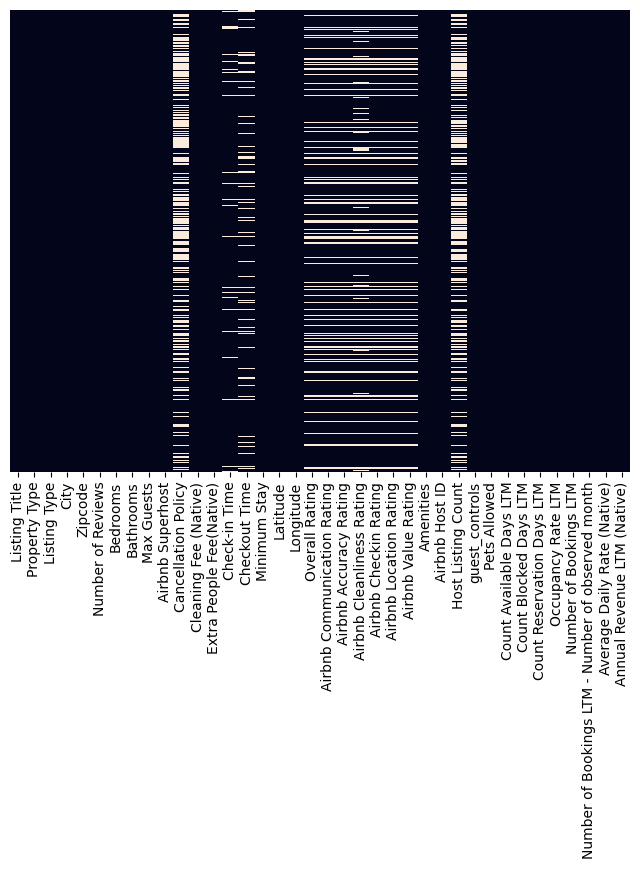

In [11]:
sns.heatmap(airbnb_ldn.isnull(), yticklabels=False, cbar=False)

There are many lines of data that have null values for all of the different 'rating' columns. For the purpose of this model, the rating component will be essential to the ultimate output. Hence, columns that do not have this relevant information will not be useful for any form of insights. All columns that have null values for all rating rows will be dropped:

In [12]:
# return columns that have null values for all rating rows:

airbnb_ldn[airbnb_ldn[['Overall Rating', 
            'Airbnb Communication Rating', 
            'Airbnb Accuracy Rating', 
            'Airbnb Cleanliness Rating',
            'Airbnb Checkin Rating',
            'Airbnb Location Rating',
            'Airbnb Value Rating']].isnull().any(axis=1)]

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Cancellation Policy,Cleaning Fee (Native),Extra People Fee(Native),Check-in Time,Checkout Time,Minimum Stay,Latitude,Longitude,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Amenities,Airbnb Host ID,Host Listing Count,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
0,Twin Ensuite with Shower at Colnbrook Lodge Gu...,Private room in guesthouse,private_room,Colnbrook,SL3 0,0,1,1,2,f,NaN,0.0,0.0,3:00 PM - 11:00 PM,11:00 AM,1,51.479570,-0.501750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Breakfas...",436870537,0.0,"{""allows_children"": true, ""allows_infants"": tr...",False,0,365,0,28,0,4,94.8,690.5
3,Chessington World of Adventures House,Entire home,entire_home,Greater London,KT9 2,2,3,2,5,f,strict_14_with_grace_period,42.7,0.0,NaN,11:00 AM,6,51.356640,-0.313630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Air conditioning...",330764063,0.0,"{""allows_children"": true, ""allows_infants"": tr...",True,11,354,5,55,0,3,120.9,774.2
13,Semi-detached house （en-suite bathroom room),Private room in home,private_room,Surrey,KT19 9,0,1,1,2,f,NaN,0.0,0.0,NaN,NaN,1,51.363000,-0.284000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'TV', 'Sm...",531004914,NaN,"{""allows_children"": false, ""allows_infants"": f...",False,38,327,17,54,4,3,60.0,1232.4
16,Catsit in exchange for cheap stay,Private room in rental unit,private_room,Feltham,TW13 4,0,1,1,5,f,NaN,0.0,0.0,After 4:00 PM,NaN,2,51.433754,-0.425476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",30482986,NaN,"{""allows_children"": true, ""allows_infants"": fa...",False,11,354,8,87,0,0,43.5,415.5
20,Bright And Peaceful Home With Parking,Entire home,entire_home,Greater London,TW12 3,0,2,2,4,f,NaN,0.0,0.0,After 4:00 PM,11:00 AM,3,51.423084,-0.378984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",492165194,NaN,"{""allows_children"": false, ""allows_infants"": f...",False,75,290,60,96,8,3,114.6,8247.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43564,"Large 3 bedroom house, 2 toilet great location",Entire home,entire_home,Greater London,RM3 8,0,4,3,7,f,strict_14_with_grace_period,117.7,9.4,NaN,NaN,3,51.600480,0.227930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",19826493,80.0,"{""allows_children"": true, ""allows_infants"": tr...",False,43,322,6,17,2,-8,229.9,1915.8
43567,Good,Private room,private_room,Romford,RM3 9,0,0,0,2,f,flexible,0.0,0.0,After 11:00 AM,11:00 AM,1,51.604640,0.236070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Breakfas...",3148837,1.0,"{""allows_children"": false, ""allows_infants"": f...",False,150,215,102,82,23,13,49.0,6024.5
43573,1. Ground floor apartment,Entire rental unit,entire_home,Greater London,RM14 2,0,1,1,4,f,NaN,0.0,0.0,NaN,NaN,3,51.557255,0.250710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",185324181,NaN,"{""allows_children"": false, ""allows_infants"": f...",True,69,296,54,94,3,1,77.4,5021.2
43574,2 apartment with lots of beds,Entire rental unit,entire_home,Greater London,RM14 2,0,1,1,8,f,NaN,0.0,0.0,3:00 PM - 9:00 PM,10:00 AM,3,51.557492,0.250736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",185324181,NaN,"{""allows_children"": false, ""allows_infants"": f...",False,31,334,13,50,2,1,116.9,1812.3


There are rows that have null values just on certain columns of the different column ratings. For now, only those columns that have null values for the 'Overall Rating' column will be dropped:

In [13]:
# drop all rows with null values in 'Overall Rating' column:
airbnb_ldn.dropna(subset=['Overall Rating'], inplace=True)

Check for duplicate rows:

In [14]:
airbnb_ldn.duplicated().sum()

0

There are a vast quantity of properties within this dataset, covering a range of different areas. The dataset contains a large quantity of properties that are on the outer edges of London. For the purpose of this project, only properties within the London postal districts will be considered, these are: W, SW, SE, E, N, NW, WC and EC. All rows that do not have a postcode that starts with one of these 8 letter combinations will be dropped.

In [15]:
# create a dataframe, containing only those rows that have the relevant postcodes:
ldn_pd_airbnb = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('W') |
            airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('E') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SE') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SW') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NE') |
            airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('N') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NW') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('WC') |
            airbnb_ldn['Zipcode'].str.slice(0,3).str.contains('EC') 
            ]

Check the shape of the London postcode dataframe:

In [16]:
ldn_pd_airbnb.shape

(32686, 38)

In [17]:
airbnb_ldn_final = ldn_pd_airbnb.reset_index(drop=True).copy()

This dataframe will be saved as a CSV:

In [18]:
airbnb_ldn_final.to_csv('airbnb_ldn_final.csv')

Test change